# ЛР 3 Задача классификации. Сверточная нейронная сеть
Крючкова Анастасия Сергеевна

# Импорты и убираем предупреждения

In [1]:
import warnings
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

# Получение списка классов изображений

In [2]:
IMAGE_PATH = './content/bus/'

CLASS_LIST = sorted([cls for cls in os.listdir(IMAGE_PATH) if cls != '.DS_Store'])
CLASS_COUNT = len(CLASS_LIST)
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Входящий', 'Выходящий']


# Вывод нескольких примеров изображений из каждого класса

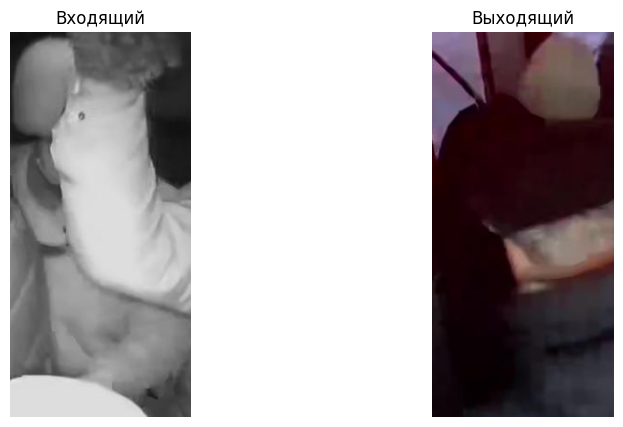

In [3]:
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))
for i, cls in enumerate(CLASS_LIST):
    img_path = f'{IMAGE_PATH}{cls}/{random.choice(os.listdir(f"{IMAGE_PATH}{cls}"))}'
    axs[i].set_title(cls)
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')
plt.show()

# Формирование списков файлов и меток классов

In [4]:
data_files = []
data_labels = []
for class_label, class_name in enumerate(CLASS_LIST):
    class_files = [f'{IMAGE_PATH}{class_name}/{file_name}' for file_name in os.listdir(f'{IMAGE_PATH}{class_name}')]
    data_files.extend(class_files)
    data_labels.extend([class_label] * len(class_files))
print(f'Общий размер базы для обучения: {len(data_labels)}')


Общий размер базы для обучения: 9081


# Параметры изображений

In [5]:
IMG_HEIGHT, IMG_WIDTH = 32, 64
BATCH_SIZE_1, BATCH_SIZE_2 = 128, 32

# Загрузка и преобразование изображений

In [6]:
data_images = [np.array(Image.open(file).resize((IMG_WIDTH, IMG_HEIGHT)).convert("L")) for file in data_files]
x_data = np.array(data_images).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
y_data = np.array(data_labels)

# Разделение на обучающую и валидационную выборки

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Генераторы изображений для обучения с расширением данных

In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE_1)
val_generator = datagen.flow(x_val, y_val, batch_size=BATCH_SIZE_2)

# Определение архитектуры модели

In [9]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)),
    BatchNormalization(),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(CLASS_COUNT, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 32, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 8, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 8, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,106 (1.98 MB)

 Trainable params: 518,066 (1.98 MB)

 Non-trainable params: 1,040 (4.06 KB)

# Компиляция модели

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Обучение модели

In [11]:
history = model.fit(train_generator, epochs=300, validation_data=val_generator, verbose=1)

Epoch 1/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.6050 - loss: 0.7911 - val_accuracy: 0.7199 - val_loss: 0.6651
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.6455 - loss: 0.7317 - val_accuracy: 0.7199 - val_loss: 0.6396
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.6684 - loss: 0.6888 - val_accuracy: 0.7199 - val_loss: 0.6219
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.6759 - loss: 0.6535 - val_accuracy: 0.7199 - val_loss: 0.5976
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.6857 - loss: 0.6484 - val_accuracy: 0.7199 - val_loss: 0.5851
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.6874 - loss: 0.6501 - val_accuracy: 0.7199 - val_loss: 0.5800
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.6959 - loss: 0.6244 - val_accuracy: 0.7199 - val_loss: 0.5766
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.7079 - loss: 0.6126 - val_acc

# Построение графиков точности и потерь

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Обучающая')
plt.plot(history.history['val_accuracy'], label='Проверочная')
plt.title('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Обучающая')
plt.plot(history.history['val_loss'], label='Проверочная')
plt.title('Ошибка')
plt.legend()
plt.show()
